<a href="https://colab.research.google.com/github/Preciousosas/Stage-E/blob/main/Individual_Household_Electric_Power_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('/content/drive/MyDrive/Hamoye/household_power_consumption.txt')

# convert text file to csv
df.to_csv('household_power_consumption.csv',index=False)

In [34]:
# Read data
df_csv = pd.read_csv('household_power_consumption.csv',delimiter=';')

df_csv.head()

<ipython-input-34-e85a98b9075c>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv('household_power_consumption.csv',delimiter=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [35]:
# check the data
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [36]:
# check for missing values
df_csv.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [37]:
# Identify and extract rows with any null values
df_csv[df_csv.isnull().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


Let's tackle the missing Values in Sub_metering_3 column

In [38]:
# drop null rows
df_csv.dropna(inplace=True)

In [39]:
# convert Date column to DateTime
df_csv['Date'] = pd.to_datetime(df_csv['Date'])


# convert numeric columns to numeric type
df_csv['Global_active_power'] = pd.to_numeric(df_csv['Global_active_power'])
df_csv['Global_reactive_power'] = pd.to_numeric(df_csv['Global_reactive_power'])
df_csv['Voltage'] = pd.to_numeric(df_csv['Voltage'])
df_csv['Global_intensity'] = pd.to_numeric(df_csv['Global_intensity'])
df_csv['Sub_metering_1'] = pd.to_numeric(df_csv['Sub_metering_1'])
df_csv['Sub_metering_2'] = pd.to_numeric(df_csv['Sub_metering_2'])

<ipython-input-39-78d7e0fa7cd2>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_csv['Date'] = pd.to_datetime(df_csv['Date'])


In [40]:
# Drop time column
df_csv.drop('Time',axis=1, inplace= True)

In [41]:
# Downsample to daily data point
df_daily = df_csv.resample('D', on='Date').mean()

In [42]:
# Check out the new dataframe
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308062,6.467361,0.000000,1.838889,9.765972


In [43]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2006-12-16 to 2010-11-26
Freq: D
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    1433 non-null   float64
 1   Global_reactive_power  1433 non-null   float64
 2   Voltage                1433 non-null   float64
 3   Global_intensity       1433 non-null   float64
 4   Sub_metering_1         1433 non-null   float64
 5   Sub_metering_2         1433 non-null   float64
 6   Sub_metering_3         1433 non-null   float64
dtypes: float64(7)
memory usage: 90.1 KB


In [46]:
# ReSet index
df_daily.reset_index(inplace = True)

In [51]:
df_daily[df_daily.isnull().any(axis=1)]

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
134,2007-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,2009-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124,2010-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1341,2010-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1342,2010-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1343,2010-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1344,2010-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1380,2010-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1381,2010-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# fill all nan with zero
df_daily.fillna(0,inplace=True)

<Axes: xlabel='Date'>

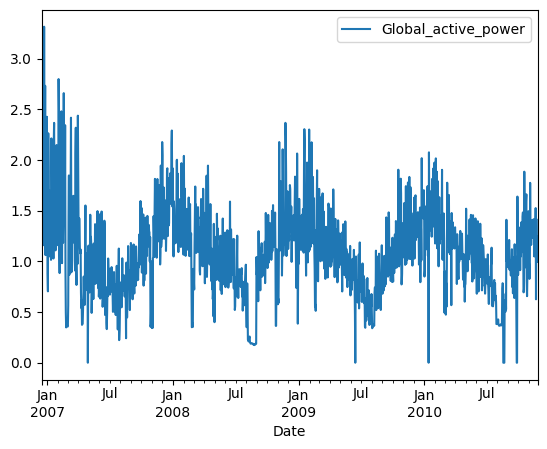

In [53]:
# plot Date against Global_active_power
df_daily.plot(x= 'Date', y='Global_active_power')

In [54]:
# import stats models
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

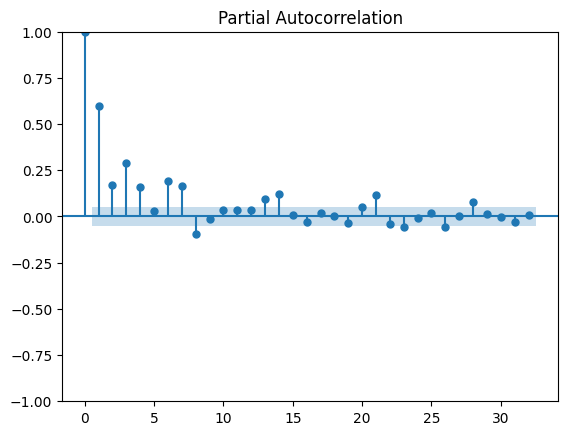

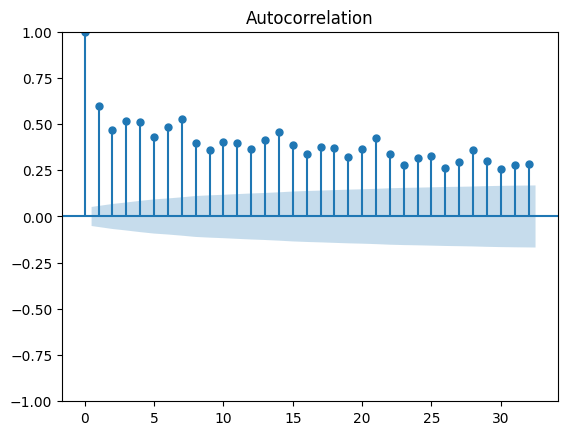

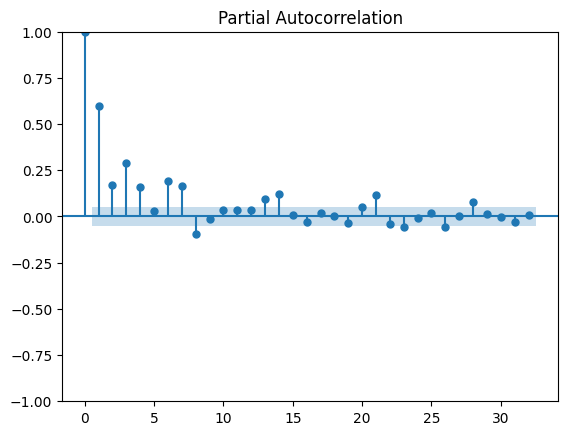

In [56]:
# plot ACF
plot_acf(df_daily['Global_active_power'])

# plot PACF
plot_pacf(df_daily['Global_active_power'])